## Resumo do artigo, visando um melhor entendimento para criação de um tutorial adequado para aqueles que pretendem reproduzí-lo.

### **Título:**
## Training and Meta-Training Binary Neural Networks with Quantum Computing

### **Autores:**
Fawaz, Abdulah, et al.

### **Grupo que criou o resumo e tutorial:**
André, Daivid e Felipe


### **Problema:**

1 - Encontrar um conjunto adequado de pesos para uma rede neural tornou-se um dos problemas mais estudados do aprendizado de máquina moderno.

2 - É um desafio significativo aos cientistas da computação para os quais poucas alternativas bem-sucedidas estão disponíveis. Pode ser difícil explorar espaços de pesquisa muito grandes com eficiência e, pior, a otimização pode convergir para um mínimo local longe do ideal global.

3 - Também é difícil entender o cenário das funções de custo, e escolher hiperparâmetros e projetar redes neurais permanece principalmente um processo manual.


### **Possível solução:**

1 - À medida que a lei de Moore se aproxima de seu fim, dois novos paradigmas de computação foram explorados: computadores neuromórficos e quânticos. A computação quântica é baseada em bits quânticos, obedecendo às leis da física quântica, em oposição aos bits clássicos de hoje que são baseados na física clássica. O aprendizado de máquina quântico visa encontrar uma vantagem na aplicação da computação quântica ao aprendizado de máquina.

Motivação:

1 - Os computadores quânticos prometem vantagens significativas em relação aos computadores clássicos para diversas aplicações diferentes.

2 - Alguns algoritmos quânticos prometem uma revolução no aprendizado de máquina na teoria, mas contêm muitas lacunas na sua implementação na prática.

3 - A principal vantagem dos qubits sobre os bits clássicos é sua capacidade de estar em superposições quânticas de estados. A chave deste método é representar todos os parâmetros a serem investigados como qubits, que são então colocados em superposição e com isso aumentar a velocidade do processamento visto que as funções podem ser aplicadas de maneira paralela quando vários qubits estão em superposição.


### **O que foi feito!**

1 - Neste artigo, é mostrado que um computador quântico pode gerar um estado quântico que representa todo o cenário de custos para uma determinada rede neural e que o cenário completo da função de perda de uma rede neural pode ser representado como a saída do estado quântico por um computador quântico.

2 - Foi demonstrado explicitamente para uma rede neural binária e, além disso, apresentou-se como um computador quântico pode treinar a rede manipulando esse estado usando um algoritmo conhecido conhecido como amplificação de amplitude quântica.

3 - Mostraram que, com pequenas adaptações, esse método também pode representar o cenário de meta-perdas de várias arquiteturas de redes neurais simultaneamente.

4 - Pesquisaram esse cenário de meta-perda com o mesmo método para treinar e projetar simultaneamente uma rede neural binária.

### **Limitações**

1 - Devido à inevitável questão de ser capaz apenas de simular circuitos quânticos envolvendo um pequeno número de qubits, dizem que foram forçados a se restringir a um pequeno problema construído como prova de conceito. Essa é a razão pela qual escolheram investigar uma rede neural binária tão pequena - os pesos podem ser representados usando poucos qubits. 

2 - Resaltaram várias vezes que esse método não se restringe a pesos ou parâmetros binarizados, e que métodos análogos usando representações de ponto flutuante seriam possíveis, com mais qubits, e o método funcionaria de forma idêntica, porém em nenhum momento apresentaram uma solução que se aproxime disse, se mantiveram apensar com as explicações binárias.

(Portanto, o cerne da tarefa é construir um circuito quântico que forme um análogo quântico da rede neural escolhida. Este circuito quântico deve ter os parâmetros desejados armazenados nos valores de qubits e, dado um conjunto de pesos e dados, produzir a mesma precisão que seu equivalente clássico. Qualquer parâmetro escolhido pode ser configurado para uma superposição quântica aplicando uma única porta Hadamard.)


### **Resultado**

O método mostra-se versátil e capaz de representar um cenário de meta-custo de todos os parâmetros e hiperparâmetros possíveis. Aplicando-o às conectividades e pesos de uma rede neural binária e simulando o algoritmo quântico em um computador clássico, mostramos ainda que esse "estado de paisagem" pode ser usado para treinar e meta-treinar a rede neural binária para um pequeno problema simples usando amplitude quântica amplificação, um algoritmo quântico padrão.

### **Possibilidade de Melhoria**

O artigo faz uso de simuladores para rodar o algoritmo quântico, podemos fazê-lo roda em um computador quântico da IBM para podermos verificar se o resultado quando rodamos fora do ambiente simulado é o mesmo, e se é aplicável caso seja diferente.

Tentar também criar uma prova de conceito para redes não binárias. 

In [33]:
## matplotlib to see the circuits
%matplotlib inline
## qiskit standart
from qiskit import *

In [34]:
## See available eviroments
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

### **Vamos tentar montar o circuito do perceptron apresentado no artigo**

Temos 1 perceptron que tem 3 entradas e uma saída, logo:

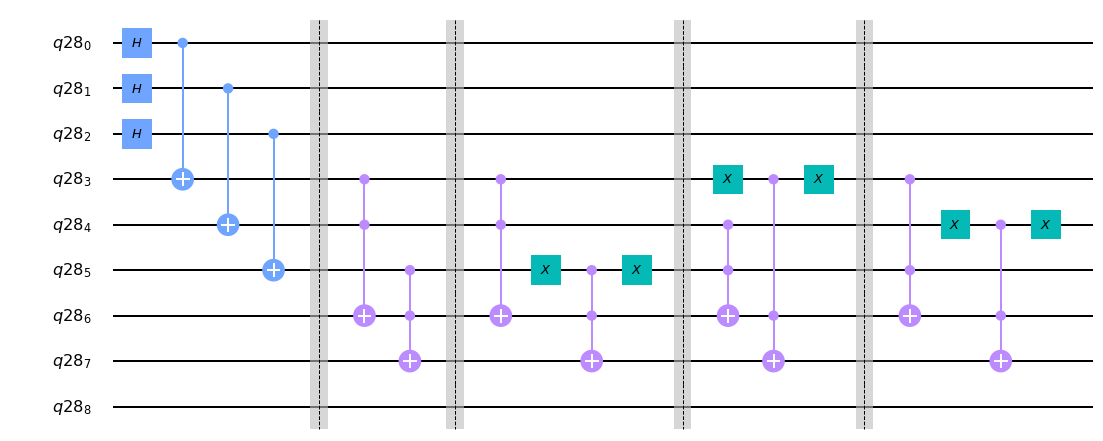

In [35]:
# Array com 8 bits quânticos
# Os 3 [0 - 2] primeiros representam pesos
# Os 3 seguintes [3 - 5] representam inputs
# O penúltimo uma ancila e o último o qubit resultante
# Note que o Qubit resultante é o resultado após a função de ativação

# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, )

# just define a multiply function to not repeat this code
def multiplyWeightInput(circuit, x, y):
    circuit.h(x)
    circuit.cx(x, y)

# Então, aqui temos a implementação de um perceptron com 3 entradas.
multiplyWeightInput(circuit, qWI[0], qWI[3])
multiplyWeightInput(circuit, qWI[1], qWI[4])
multiplyWeightInput(circuit, qWI[2], qWI[5])
circuit.barrier()
circuit.ccx(qWI[3], qWI[4], qWI[6])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.barrier()
circuit.ccx(qWI[3], qWI[4], qWI[6])
circuit.x(qWI[5])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[5])
circuit.barrier()
circuit.ccx(qWI[4], qWI[5], qWI[6])
circuit.x(qWI[3])
circuit.ccx(qWI[3], qWI[6], qWI[7])
circuit.x(qWI[3])
circuit.barrier()
circuit.ccx(qWI[3], qWI[5], qWI[6])
circuit.x(qWI[4])
circuit.ccx(qWI[4], qWI[6], qWI[7])
circuit.x(qWI[4])
# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")